# <center>The Battle of the Neighborhoods </center>


## Table of contents
* Introduction
* Data to be used
* Importing Librairies
* Data scrapping
* Data manipulation and description
* Coordinates retrieving and map creation
* Venues exploration
* Restaurants exploration
* Exploring the venues per neighborhood
* Exploring the restaurants per neighborhood
* Clustering the neighborhood for restaurants
* Analysis of the cluster
* Conclusion

# Introduction

### General overview

Paris is the city of lights and love, and attracts more than 50 millions tourists a year. <br /> 
With its museums, monuments, rsetaurants and shops, Paris is the most visited capital in the world. For a weekend or for a week, for lovers or for families and friends visiting, there are a lot of venues that can be of interest for tourists. <br /> 



### Business Problem

With a city with that much tourists, there sure are a lot of business that can be opened to be useful to tourists. This report is to be used by business person looking to open a business in Paris, to determine what kind of business to open, and where to open it to attract tourists, with few competition. <br /> 

We will use data to first identify the most popular business to open, then we'll focus on the neighborhoods where it would be suitable to open the business, in lights of the two constraints above : attracting tourists, and few competition.

# Data to be used

To handle our business problem, we used the following data : <br />
* Neighborhood data for Paris
* Coordinates of the neighborhoods of Paris
* The data relative to the venues in Paris

### Neighborhood data

To retrieve the neighborhood data for Paris, we used the wikipedia page listing the neighborhood in Paris, and scraped its content using the pandas method pd.read_html, that can be easily used since Wikipedia use html tables. The url is the following  : https://en.wikipedia.org/wiki/Quarters_of_Paris<br />
The extracted data resulted in a dataframe listing for each District ('Arrondissement') in Paris the neighborhood in said districts. <br />
There are 20 districts in Paris, and 4 neighborhoods per district, which gives a total of 80 neighborhoods in Paris

### Coordinates of neighborhoods

To retrieve the coordinates for each neighborhood, which list we previously scraped, we used the geocoder library. <br />
The coordinates are useful for later visualization on a map, using the Folium library.

### Venues data

The venues data are extracted using Foursquare API, to get the venues for each neighborhood, in a radius of 500m around the center of the neighborhood. <br />
For each venue, we have :
* The name of the venue
* The coordinates of the venue
* The venue category <br />

The venue category data will be particularly useful to determine which kind of venue are the most frequent.

### Importing Librairies

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
from geopy.geocoders import Nominatim

import requests 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
import folium 
import geocoder
from bs4 import BeautifulSoup 

In [170]:
import matplotlib.pyplot as plt

In [292]:
from sklearn.metrics import silhouette_score

### Data Scrapping 

We are scrapping the Wikipedia Page listing neighborhoods in Paris to get a dataframe, using read_html.  <br /> 

In [40]:
url = 'https://en.wikipedia.org/wiki/Quarters_of_Paris'
df = pd.read_html(url)[0]

Let's check out our dataframe

In [42]:
df.head()

,Arrondissement(Districts),Quartiers(Quarters),Quartiers(Quarters).1,Population in1999[3],Area(hectares)[3],Map
0,"1st arrondissement(Called ""du Louvre"")",1st,Saint-Germain-l'Auxerrois,1672,86.9,NaN
1,"1st arrondissement(Called ""du Louvre"")",2nd,Les Halles,8984,41.2,NaN
2,"1st arrondissement(Called ""du Louvre"")",3rd,Palais-Royal,3195,27.4,NaN
3,"1st arrondissement(Called ""du Louvre"")",4th,Place-Vendôme,3044,26.9,NaN
4,"2nd arrondissement(Called ""de la Bourse"")",5th,Gaillon,1345,18.8,NaN


### Data manipulation

We rearrange the columns name and drop the map column

In [43]:
df.drop('Map',axis = 1)

,Arrondissement(Districts),Quartiers(Quarters),Quartiers(Quarters).1,Population in1999[3],Area(hectares)[3]
0,"1st arrondissement(Called ""du Louvre"")",1st,Saint-Germain-l'Auxerrois,1672,86.9
1,"1st arrondissement(Called ""du Louvre"")",2nd,Les Halles,8984,41.2
2,"1st arrondissement(Called ""du Louvre"")",3rd,Palais-Royal,3195,27.4
3,"1st arrondissement(Called ""du Louvre"")",4th,Place-Vendôme,3044,26.9
4,"2nd arrondissement(Called ""de la Bourse"")",5th,Gaillon,1345,18.8
5,"2nd arrondissement(Called ""de la Bourse"")",6th,Vivienne,2917,24.4
6,"2nd arrondissement(Called ""de la Bourse"")",7th,Mail,5783,27.8
7,"2nd arrondissement(Called ""de la Bourse"")",8th,Bonne-Nouvelle,9595,28.2
8,"3rd arrondissement(Called ""du Temple"")",9th,Arts-et-Métiers,9560,31.8
9,"3rd arrondissement(Called ""du Temple"")",10th,Enfants-Rouges,8562,27.2


In [55]:
df.rename(columns={'Arrondissement(Districts)' : 'District', 'Quartiers(Quarters)' : 'Quarter n°',
                   'Quartiers(Quarters).1' : 'Quarter',
                  'Population in1999[3]' : 'Population in 1999', 'Area(hectares)[3]' : 'Area in hectare'}, inplace = True)

In [47]:
df.drop('Map',axis = 1, inplace = True)

In [56]:
df.head()

,District,Quarter n°,Quarter,Population in 1999,Area in hectare
0,"1st arrondissement(Called ""du Louvre"")",1st,Saint-Germain-l'Auxerrois,1672,86.9
1,"1st arrondissement(Called ""du Louvre"")",2nd,Les Halles,8984,41.2
2,"1st arrondissement(Called ""du Louvre"")",3rd,Palais-Royal,3195,27.4
3,"1st arrondissement(Called ""du Louvre"")",4th,Place-Vendôme,3044,26.9
4,"2nd arrondissement(Called ""de la Bourse"")",5th,Gaillon,1345,18.8


Checking out the data types in the dataframe

In [66]:
df.dtypes

District               object
Quarter n°             object
Quarter                object
Population in 1999      int64
Area in hectare       float64
dtype: object

In [61]:
df.describe(include='all')

,District,Quarter n°,Quarter,Population in 1999,Area in hectare
count,80,80,80,80.000000,80.000000
unique,20,80,80,NaN,NaN
top,"7th arrondissement(Called ""du Palais-Bourbon"")",49th,Bel-Air,NaN,NaN
freq,4,1,1,NaN,NaN
mean,NaN,NaN,NaN,26573.137500,121.398750
std,NaN,NaN,NaN,20235.804847,132.880318
min,NaN,NaN,NaN,1345.000000,18.800000
25%,NaN,NaN,NaN,9413.750000,49.750000
50%,NaN,NaN,NaN,21418.500000,92.850000
75%,NaN,NaN,NaN,39025.250000,144.800000


We see that each district has a maximum of 4 quarters. Let's see more in details how many quarter there is per district

In [62]:
df['District'].value_counts()

7th arrondissement(Called "du Palais-Bourbon")           4
4th arrondissement(Called "de l'Hôtel-de-Ville")         4
11th arrondissement(Called "de Popincourt")              4
9th arrondissement(Called "de l'Opéra")                  4
13th arrondissement(Called "des Gobelins")               4
20th arrondissement(Called "de Ménilmontant")            4
3rd arrondissement(Called "du Temple")                   4
12th arrondissement(Called "de Reuilly")                 4
10th arrondissement(Called "de l'Entrepôt")              4
6th arrondissement(Called "du Luxembourg")               4
8th arrondissement(Called "de l'Élysée")                 4
16th arrondissement(Called "de Passy")                   4
17th arrondissement(Called "des Batignolles-Monceau")    4
15th arrondissement(Called "de Vaugirard")               4
5th arrondissement(Called "du Panthéon")                 4
14th arrondissement(Called "de l'Observatoire")          4
19th arrondissement(Called "des Buttes-Chaumont")       

Actually, we have exactly 4 neighborhoods per district. <br />
Let's put them on a map to visualize <br /> 
First, we fetch the coordinates of each neighborhood and put them in a list <br />

### Coordinates retrieving and map creation

In [110]:
list_coord_neigh = []

for i, quart in enumerate(df['Quarter']):
    cell = {}
    address_quarter = quart + ', Paris' + ', France'
    geolocator_quarter = Nominatim(user_agent="paris_explorer")
    location_quarter = geolocator_quarter.geocode(address_quarter)
    latitude_quarter = location_quarter.latitude
    longitude_quarter = location_quarter.longitude
    
    cell['Quarter'] = quart
    cell['Latitude'] = latitude_quarter
    cell['Longitude'] = longitude_quarter
    
    list_coord_neigh.append(cell)


We transform the list into a DataFrame

In [112]:
df_coordinates = pd.DataFrame(list_coord_neigh)

In [113]:
df_coordinates

,Quarter,Latitude,Longitude
0,Saint-Germain-l'Auxerrois,48.860211,2.336299
1,Les Halles,48.862466,2.346009
2,Palais-Royal,48.863585,2.336204
3,Place-Vendôme,48.867463,2.329428
4,Gaillon,48.869135,2.332909
5,Vivienne,48.868859,2.339363
6,Mail,48.868054,2.344593
7,Bonne-Nouvelle,48.870623,2.348750
8,Arts-et-Métiers,48.865407,2.356265
9,Enfants-Rouges,48.864241,2.362585


Then we merge the two dataframe

In [114]:
df_paris = pd.merge(df, df_coordinates)

In [115]:
df_paris

,District,Quarter n°,Quarter,Population in 1999,Area in hectare,Latitude,Longitude
0,"1st arrondissement(Called ""du Louvre"")",1st,Saint-Germain-l'Auxerrois,1672,86.9,48.860211,2.336299
1,"1st arrondissement(Called ""du Louvre"")",2nd,Les Halles,8984,41.2,48.862466,2.346009
2,"1st arrondissement(Called ""du Louvre"")",3rd,Palais-Royal,3195,27.4,48.863585,2.336204
3,"1st arrondissement(Called ""du Louvre"")",4th,Place-Vendôme,3044,26.9,48.867463,2.329428
4,"2nd arrondissement(Called ""de la Bourse"")",5th,Gaillon,1345,18.8,48.869135,2.332909
5,"2nd arrondissement(Called ""de la Bourse"")",6th,Vivienne,2917,24.4,48.868859,2.339363
6,"2nd arrondissement(Called ""de la Bourse"")",7th,Mail,5783,27.8,48.868054,2.344593
7,"2nd arrondissement(Called ""de la Bourse"")",8th,Bonne-Nouvelle,9595,28.2,48.870623,2.348750
8,"3rd arrondissement(Called ""du Temple"")",9th,Arts-et-Métiers,9560,31.8,48.865407,2.356265
9,"3rd arrondissement(Called ""du Temple"")",10th,Enfants-Rouges,8562,27.2,48.864241,2.362585


Now, let's put the quarters on the map

In [116]:
address = 'Paris, France'

geolocator = Nominatim(user_agent="my_paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [118]:
map_paris = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df_paris['Latitude'], df_paris['Longitude'], df_paris['Quarter']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

### Venues exploration

Now let's explore the venue per neighborhood <br />
Starting with importing Foursquare Credentials

In [119]:
CLIENT_ID = 'UHK10X1A4OHLI43YUTOZEI0MFFJKLSN0FJ5KJDYGRT3I24JO' # your Foursquare ID
CLIENT_SECRET = 'EVVYKNAVQ3QSD5VZEYWJA2FLG4JAEAGFQSZGXIVIKNLJ3OFN' # your Foursquare Secret
ACCESS_TOKEN = 'TMK0TE0LBDPGD0XL23H1BN0ZCVH25CHYBRZKS0UPS5DT0TOZ' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: UHK10X1A4OHLI43YUTOZEI0MFFJKLSN0FJ5KJDYGRT3I24JO
CLIENT_SECRET:EVVYKNAVQ3QSD5VZEYWJA2FLG4JAEAGFQSZGXIVIKNLJ3OFN


We create a function allowing to explore the venues in a radius of 500m around the neighborhood

In [120]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now we extract the venues of each neighborhood in Paris

In [232]:
paris_venues = getNearbyVenues(df_paris['Quarter'], df_paris['Latitude'], df_paris['Longitude'], radius=500)

Saint-Germain-l'Auxerrois
Les Halles
Palais-Royal
Place-Vendôme
Gaillon
Vivienne
Mail
Bonne-Nouvelle
Arts-et-Métiers
Enfants-Rouges
Archives
Sainte-Avoye
Saint-Merri
Saint-Gervais
Arsenal
Notre-Dame
Quartier Saint-Victor
Jardin-des-Plantes
Val-de-Grâce
Sorbonne
Monnaie
Odéon
Notre-Dame-des-Champs
Saint-Germain-des-Prés
Saint-Thomas-d'Aquin
Les Invalides
École-Militaire
Gros-Caillou
Champs-Élysées
Faubourg-du-Roule
La Madeleine
Europe
Saint-Georges
Chaussée-d'Antin
Faubourg-Montmartre
Rochechouart
Saint-Vincent-de-Paul
Porte-Saint-Denis
Porte-Saint-Martin
Hôpital-Saint-Louis
Folie-Méricourt
Saint-Ambroise
La Roquette
Sainte-Marguerite
Bel-Air
Picpus
Bercy
Quinze-Vingts
Salpêtrière
La Gare
Maison-Blanche
Croulebarbe
Montparnasse
Parc Montsouris
Petit-Montrouge
Plaisance
Saint-Lambert
Necker
Grenelle
Javel
Auteuil
La Muette
Porte-Dauphine
Chaillot
Les Ternes
Plaine Monceau
Batignolles
Épinettes
Grandes-Carrières
Clignancourt
Goutte-d'Or
La Chapelle
La Villette
Pont-de-Flandre
Amérique
Com

Checking the venues in Paris

In [233]:
paris_venues.head(25)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Saint-Germain-l'Auxerrois,48.860211,2.336299,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
1,Saint-Germain-l'Auxerrois,48.860211,2.336299,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
2,Saint-Germain-l'Auxerrois,48.860211,2.336299,Musée du Louvre,48.860847,2.336440,Art Museum
3,Saint-Germain-l'Auxerrois,48.860211,2.336299,Pylones,48.861419,2.334143,Gift Shop
4,Saint-Germain-l'Auxerrois,48.860211,2.336299,Pont des Arts,48.858565,2.337635,Bridge
5,Saint-Germain-l'Auxerrois,48.860211,2.336299,Cour Napoléon,48.861172,2.335088,Plaza
6,Saint-Germain-l'Auxerrois,48.860211,2.336299,Vestige de la Forteresse du Louvre,48.861577,2.333508,Historic Site
7,Saint-Germain-l'Auxerrois,48.860211,2.336299,Place du Palais Royal,48.862523,2.336688,Plaza
8,Saint-Germain-l'Auxerrois,48.860211,2.336299,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",48.860724,2.332121,Art Museum
9,Saint-Germain-l'Auxerrois,48.860211,2.336299,Place du Louvre,48.859841,2.340822,Plaza


In [234]:
paris_venues.shape

(2322, 7)

In [235]:
len(paris_venues['Venue Category'].unique())

231

In [236]:
paris_venues.describe(include='all')

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
count,2322,2322.000000,2322.000000,2322,2322.000000,2322.000000,2322
unique,80,NaN,NaN,1865,NaN,NaN,231
top,Chaillot,NaN,NaN,Carrefour City,NaN,NaN,French Restaurant
freq,30,NaN,NaN,16,NaN,NaN,321
mean,NaN,48.861076,2.342284,NaN,48.861062,2.342385,NaN
std,NaN,0.017439,0.030848,NaN,0.017182,0.030654,NaN
min,NaN,48.821991,2.266738,NaN,48.818503,2.260499,NaN
25%,NaN,48.849123,2.324562,NaN,48.849750,2.324766,NaN
50%,NaN,48.861052,2.345004,NaN,48.861520,2.344926,NaN
75%,NaN,48.871727,2.362585,NaN,48.872487,2.362263,NaN


In [225]:
len(paris_venues['Venue Category'].unique())

231

From the 3 previous lines, we can see that we that the Foursquare API returns 2322 venues for all neighborhoods in Paris. We also see that there are 231 venue types.
We see that the top venue category is French Restaurant.
Let's focus on the venue category on which has the name "restaurant".

### Restaurant venue exploration

In [237]:
paris_restaurant = paris_venues[paris_venues['Venue Category'].str.contains('Restaurant')]
paris_restaurant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
16,Saint-Germain-l'Auxerrois,48.860211,2.336299,LouLou,48.862804,2.333500,Italian Restaurant
23,Saint-Germain-l'Auxerrois,48.860211,2.336299,La Régalade Saint-Honoré,48.861620,2.341749,French Restaurant
28,Saint-Germain-l'Auxerrois,48.860211,2.336299,Boutique yam'Tcha,48.861710,2.342380,Chinese Restaurant
33,Les Halles,48.862466,2.346009,Pirouette,48.862876,2.348135,French Restaurant
36,Les Halles,48.862466,2.346009,Enza & Famiglia,48.861191,2.343449,Italian Restaurant


In [238]:
paris_restaurant.shape

(855, 7)

In [239]:
len(paris_restaurant['Venue Category'].unique())

61

Out of 2322 venues in Paris, 855 of them are restaurants, which is more than 1 out of 3 venues.
Opening a restaurant seems to be a profitable business. <br /> 
Let's verify which kind of cuisine is the most recurrent, since there are 61 different type of cuisine

In [240]:
paris_restaurant.groupby('Venue Category').count().sort_values(by='Venue', ascending=False)['Neighborhood']

Venue Category
French Restaurant                  321
Italian Restaurant                  99
Restaurant                          52
Japanese Restaurant                 50
Thai Restaurant                     32
Seafood Restaurant                  30
Chinese Restaurant                  22
Vietnamese Restaurant               20
Indian Restaurant                   20
Asian Restaurant                    19
Korean Restaurant                   15
Vegetarian / Vegan Restaurant       10
Tapas Restaurant                    10
Sushi Restaurant                    10
Moroccan Restaurant                  9
Falafel Restaurant                   9
Lebanese Restaurant                  8
Mediterranean Restaurant             7
Argentinian Restaurant               7
Greek Restaurant                     6
African Restaurant                   6
Fast Food Restaurant                 5
Corsican Restaurant                  5
Ethiopian Restaurant                 5
Turkish Restaurant                   5
Breton Res

French cuisine is the most popular, this is not suprising. <br />
Let's check the repartition of venue per neighborhood <br />
But first, for our analysis, let's replace the cuisine type by the word restaurant, to confirm our intuition that restaurant are the most frequent venues, independantly of the type of cuisine

In [241]:
paris_venues_restgr = paris_venues
paris_venues_restgr.loc[paris_venues_restgr['Venue Category'].str.contains('Restaurant'), 'Venue Category'] = 'Restaurant'


In [246]:
# paris_venues_restgr.head(20)
paris_venues_restgr.shape

(2322, 7)

In [312]:
paris_venues_restgr['Venue Category'].nunique()

171

### Exploring the venues in each neighborhood

We start by doing one hot encoding of the categorical variables

In [244]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues_restgr[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues_restgr['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,Accessories Store,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Stop,Butcher,Café,Canal,Candy Store,Cemetery,Cheese Shop,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Electronics Store,Escape Room,Exhibit,Farmers Market,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General College & University,General Entertainment,Gift Shop,Gourmet Shop,Government Building,Grocery Store,Gym / Fitness Center,Gym Pool,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Island,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Laundromat,Leather Goods Store,Library,Liquor Store,Lounge,Lyonese Bouchon,Market,Memorial Site,Men's Store,Metro Station,Miscellaneous Shop,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Newsstand,Nightclub,Noodle House,Opera House,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Pet Café,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Pub,Record Shop,Resort,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Skating Rink,Souvenir Shop,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Taco Place,Tailor Shop,Tattoo Parlor,Tea Room,Tech Startup,Theater,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Trattoria/Osteria,Video Game Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Saint-Germain-l'Auxerrois,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [245]:
paris_onehot.shape

(2322, 172)

Now we group per neighborhood and observe the frequency for each type of venue

In [249]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()

In [250]:
paris_grouped

,Neighborhood,Accessories Store,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Stop,Butcher,Café,Canal,Candy Store,Cemetery,Cheese Shop,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Electronics Store,Escape Room,Exhibit,Farmers Market,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General College & University,General Entertainment,Gift Shop,Gourmet Shop,Government Building,Grocery Store,Gym / Fitness Center,Gym Pool,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Island,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Laundromat,Leather Goods Store,Library,Liquor Store,Lounge,Lyonese Bouchon,Market,Memorial Site,Men's Store,Metro Station,Miscellaneous Shop,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Newsstand,Nightclub,Noodle House,Opera House,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Pet Café,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Pub,Record Shop,Resort,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Skating Rink,Souvenir Shop,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Taco Place,Tailor Shop,Tattoo Parlor,Tea Room,Tech Startup,Theater,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Trattoria/Osteria,Video Game Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Amérique,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Archives,0.000000,0.000000,0.100000,0.066667,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.00

In [251]:
paris_grouped.shape

(80, 172)

We have 80 rows (as 80 neighborhoods) and 172 columns, which is coherent with of 171 types of venunes. <br />
Now let's print the 5 most frequent venues

In [252]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amérique----
               venue  freq
0            Brewery  0.07
1       Tram Station  0.07
2         Restaurant  0.07
3  Convenience Store  0.07
4        Pizza Place  0.07


----Archives----
            venue  freq
0      Restaurant  0.27
1     Art Gallery  0.10
2  Sandwich Place  0.07
3      Art Museum  0.07
4     Men's Store  0.03


----Arsenal----
          venue  freq
0    Restaurant  0.50
1         Plaza  0.07
2  Cocktail Bar  0.07
3          Park  0.07
4         Hotel  0.03


----Arts-et-Métiers----
           venue  freq
0     Restaurant  0.50
1          Hotel  0.07
2    Coffee Shop  0.07
3  Deli / Bodega  0.03
4   Concert Hall  0.03


----Auteuil----
         venue  freq
0   Restaurant  0.43
1  Supermarket  0.13
2       Bistro  0.07
3  Pizza Place  0.07
4       Market  0.03


----Batignolles----
         venue  freq
0   Restaurant  0.53
1     Wine Bar  0.13
2  Pizza Place  0.07
3  Coffee Shop  0.07
4   Steakhouse  0.03


----Bel-Air----
           venue  freq
0     Resta

         venue  freq
0   Restaurant  0.43
1       Bakery  0.10
2  Pizza Place  0.07
3   Sports Bar  0.07
4        Hotel  0.03


----Saint-Merri----
            venue  freq
0      Restaurant  0.17
1        Tea Room  0.07
2     Art Gallery  0.07
3           Plaza  0.07
4  Ice Cream Shop  0.07


----Saint-Thomas-d'Aquin----
         venue  freq
0   Restaurant  0.33
1  Art Gallery  0.07
2        Hotel  0.07
3  Cheese Shop  0.07
4       Bistro  0.07


----Saint-Vincent-de-Paul----
         venue  freq
0   Restaurant  0.67
1        Hotel  0.07
2  Supermarket  0.07
3       Hostel  0.03
4  Record Shop  0.03


----Sainte-Avoye----
          venue  freq
0    Restaurant  0.30
1   Coffee Shop  0.10
2         Hotel  0.07
3  Liquor Store  0.03
4  Gourmet Shop  0.03


----Sainte-Marguerite----
         venue  freq
0   Restaurant  0.40
1          Bar  0.10
2  Pizza Place  0.07
3     Wine Bar  0.07
4     Beer Bar  0.03


----Salpêtrière----
                  venue  freq
0            Restaurant  0.37
1 

Ok now we can organized those results in a dataframe

In [254]:
#To return the most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [266]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_restaurant_gr.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amérique,Convenience Store,Pool,Café,Bistro,Supermarket,Restaurant,Bed & Breakfast,Brewery,Basketball Court,Theater
1,Archives,Restaurant,Art Gallery,Art Museum,Sandwich Place,Creperie,Clothing Store,Farmers Market,Men's Store,Cosmetics Shop,Cheese Shop
2,Arsenal,Restaurant,Park,Plaza,Cocktail Bar,Pedestrian Plaza,Museum,Boat or Ferry,Pub,Bakery,Beer Store
3,Arts-et-Métiers,Restaurant,Hotel,Coffee Shop,Church,Bakery,Noodle House,Juice Bar,Beer Bar,Cocktail Bar,Bubble Tea Shop
4,Auteuil,Restaurant,Supermarket,Pizza Place,Bistro,Bike Rental / Bike Share,Gym / Fitness Center,Burger Joint,Art Museum,Market,Park
5,Batignolles,Restaurant,Wine Bar,Coffee Shop,Pizza Place,Gym / Fitness Center,BBQ Joint,Bar,Pastry Shop,Steakhouse,Noodle House
6,Bel-Air,Restaurant,Bakery,Supermarket,Bar,Plaza,Bus Stop,Salon / Barbershop,Fountain,Bike Rental / Bike Share,Gastropub
7,Belleville,Restaurant,Bar,Pizza Place,Cocktail Bar,Café,Hostel,Theater,Coffee Shop,Beer Store,Park
8,Bercy,Restaurant,Beer Garden,Hotel,Music Venue,Brasserie,Pizza Place,Coffee Shop,Pool,Park,Nightclub
9,Bonne-Nouvelle,Restaurant,Hotel,Wine Bar,Indie Movie Theater,Cocktail Bar,Furniture / Home Store,Juice Bar,Beer Bar,Bar,Salad Place


In [267]:
neighborhoods_venues_sorted.describe(include='all')

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,80,80,80,80,80,80,80,80,80,80,80
unique,80,5,24,31,45,44,48,50,52,53,55
top,Enfants-Rouges,Restaurant,Hotel,Hotel,Cocktail Bar,Bistro,Pizza Place,Café,Bistro,Bakery,Park
freq,1,74,26,8,9,7,7,9,7,4,4


Our intuition got confirmed : the most popular venues are restaurants in 74 out of 80 neighborhoods. <br /> 
So we know now that opening a restaurant seems a pretty good idea. Let's see what type of cuisine would be the most popular

### Exploring restaurant through each neighborhood

In [260]:
# one hot encoding
paris_onehot_rest = pd.get_dummies(paris_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot_rest['Neighborhood'] = paris_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot_rest.columns[-1]] + list(paris_onehot_rest.columns[:-1])
paris_onehot_rest = paris_onehot_rest[fixed_columns]

paris_onehot_rest.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Auvergne Restaurant,Basque Restaurant,Breton Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Chinese Restaurant,Corsican Restaurant,Dim Sum Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jiangxi Restaurant,Kebab Restaurant,Korean Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Okonomiyaki Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shandong Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
16,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,Les Halles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,Les Halles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [261]:
paris_restaurant_gr = paris_onehot_rest.groupby('Neighborhood').mean().reset_index()

In [262]:
paris_restaurant_gr 

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Auvergne Restaurant,Basque Restaurant,Breton Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Chinese Restaurant,Corsican Restaurant,Dim Sum Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jiangxi Restaurant,Kebab Restaurant,Korean Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Okonomiyaki Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shandong Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Amérique,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Archives,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.125,0.000000,0.000000,0.0000,0.125000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Arsenal,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.066667,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.066667,0.000000,0.000000
3,Arts-et-Métiers,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.066667,0.0,0.000000,0.066667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.066667,0.000000,0.133333
4,Auteuil,0.000000,0.000000,0.000000,0.000000,0.076923,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538462,0.000000,0.000000,0.000000,0.000000,0.000000,0.307692,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,Batignolles,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,

In [263]:
paris_restaurant_gr.shape

(80, 62)

We have 80 rows (as 80 neighborhoods) and 62 columns, which is coherent with of 61 types of cuisine. <br />
Now let's print the 5 most frequent venues

In [264]:
num_top_venues = 5

for hood in paris_restaurant_gr['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_restaurant_gr[paris_restaurant_gr['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amérique----
                      venue  freq
0         French Restaurant   1.0
1        African Restaurant   0.0
2   Scandinavian Restaurant   0.0
3  Mediterranean Restaurant   0.0
4        Mexican Restaurant   0.0


----Archives----
                       venue  freq
0        Japanese Restaurant  0.25
1  Cajun / Creole Restaurant  0.12
2     Okonomiyaki Restaurant  0.12
3                 Restaurant  0.12
4          French Restaurant  0.12


----Arsenal----
                           venue  freq
0              French Restaurant  0.53
1             Italian Restaurant  0.20
2                     Restaurant  0.07
3  Vegetarian / Vegan Restaurant  0.07
4                Thai Restaurant  0.07


----Arts-et-Métiers----
                   venue  freq
0      French Restaurant  0.20
1     Chinese Restaurant  0.20
2  Vietnamese Restaurant  0.13
3     Italian Restaurant  0.13
4             Restaurant  0.07


----Auteuil----
                 venue  freq
0    French Restaurant  0.54
1   Italia

                venue  freq
0   French Restaurant  0.44
1  Italian Restaurant  0.25
2  Seafood Restaurant  0.12
3          Restaurant  0.06
4   Breton Restaurant  0.06


----Mail----
                venue  freq
0   French Restaurant  0.33
1    Asian Restaurant  0.17
2  Italian Restaurant  0.17
3     Thai Restaurant  0.17
4    Greek Restaurant  0.17


----Maison-Blanche----
                   venue  freq
0  Vietnamese Restaurant  0.27
1        Thai Restaurant  0.27
2       Asian Restaurant  0.19
3     Chinese Restaurant  0.15
4   Cambodian Restaurant  0.08


----Monnaie----
                venue  freq
0  Seafood Restaurant  0.18
1  Italian Restaurant  0.18
2   French Restaurant  0.18
3          Restaurant  0.18
4   Breton Restaurant  0.09


----Montparnasse----
                    venue  freq
0       French Restaurant  0.46
1     Japanese Restaurant  0.15
2      Seafood Restaurant  0.08
3      Chinese Restaurant  0.08
4  Argentinian Restaurant  0.08


----Necker----
                   v

In [268]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_restaurants_sorted = pd.DataFrame(columns=columns)
neighborhoods_restaurants_sorted['Neighborhood'] = paris_restaurant_gr['Neighborhood']

for ind in np.arange(paris_restaurant_gr.shape[0]):
    neighborhoods_restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(paris_restaurant_gr.iloc[ind, :], num_top_venues)

neighborhoods_restaurants_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amérique,French Restaurant,Vietnamese Restaurant,Jiangxi Restaurant,Italian Restaurant,Israeli Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant,Fast Food Restaurant
1,Archives,Japanese Restaurant,Italian Restaurant,Restaurant,Israeli Restaurant,French Restaurant,Cajun / Creole Restaurant,Okonomiyaki Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant
2,Arsenal,French Restaurant,Italian Restaurant,Thai Restaurant,Tapas Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Indonesian Restaurant,Greek Restaurant,Gluten-free Restaurant
3,Arts-et-Métiers,French Restaurant,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Korean Restaurant,Argentinian Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Indian Restaurant
4,Auteuil,French Restaurant,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Eastern European Restaurant,Israeli Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant


In [269]:
neighborhoods_restaurants_sorted.describe(include='all')

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,80,80,80,80,80,80,80,80,80,80,80
unique,80,8,21,26,37,39,33,33,23,22,19
top,Enfants-Rouges,French Restaurant,Italian Restaurant,Italian Restaurant,Seafood Restaurant,Restaurant,Israeli Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant
freq,1,57,24,9,9,5,11,15,18,20,19


Our initial assumption is verified : French restaurants are the most frequents, in 57 neighborhoods out of 80 <br />
From this point on, we'll examine only the restaurants venue, using the df paris_restaurant_gr 

### Clustering the neighborhoods

Let's start by defining the optimal number of cluster, using Silouhette Method

In [315]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [317]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = paris_restaurant_gr.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

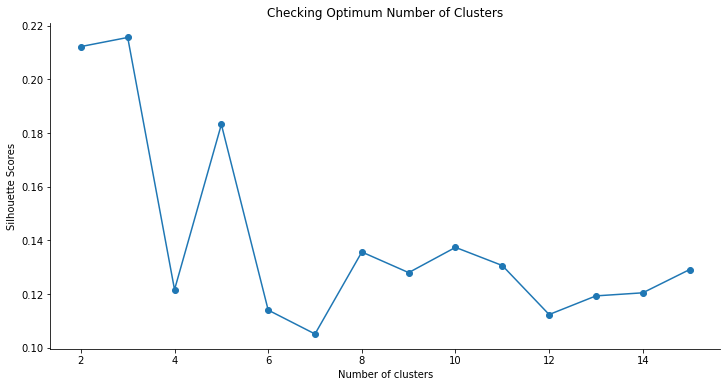

In [318]:
plot(kval, scores)

From the previous figure, we see that 3 is the optimal number of clusters.

In [295]:
# set number of clusters
kclusters = 3

paris_grouped_clustering = paris_restaurant_gr.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 1, 0, 1, 1, 1, 1, 1, 1])

We merge the dataframe with the label of each clusters

In [298]:
# add clustering labels
# neighborhoods_restaurants_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_restaurants_sorted['Cluster Labels'] = kmeans.labels_

In [304]:
paris_merged = df_paris
paris_merged.rename(columns={'Quarter':'Neighborhood'}, inplace = True)


In [305]:
# merge paris_grouped with paris_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_restaurants_sorted.set_index('Neighborhood'), on='Neighborhood')
paris_merged.head() 

,District,Quarter n°,Neighborhood,Population in 1999,Area in hectare,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"1st arrondissement(Called ""du Louvre"")",1st,Saint-Germain-l'Auxerrois,1672,86.9,48.860211,2.336299,1,Italian Restaurant,French Restaurant,Chinese Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Israeli Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant
1,"1st arrondissement(Called ""du Louvre"")",2nd,Les Halles,8984,41.2,48.862466,2.346009,1,French Restaurant,Italian Restaurant,Restaurant,Chinese Restaurant,Japanese Restaurant,Indonesian Restaurant,Ramen Restaurant,Israeli Restaurant,Indian Restaurant,Greek Restaurant
2,"1st arrondissement(Called ""du Louvre"")",3rd,Palais-Royal,3195,27.4,48.863585,2.336204,0,Italian Restaurant,Udon Restaurant,Restaurant,French Restaurant,Ramen Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant
3,"1st arrondissement(Called ""du Louvre"")",4th,Place-Vendôme,3044,26.9,48.867463,2.329428,1,French Restaurant,Japanese Restaurant,Israeli Restaurant,Jiangxi Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant,Fast Food Restaurant
4,"2nd arrondissement(Called ""de la Bourse"")",5th,Gaillon,1345,18.8,48.869135,2.332909,0,Italian Restaurant,Japanese Restaurant,English Restaurant,Jiangxi Restaurant,Israeli Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant


And now, let's visualize the clusters

In [306]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Neighborhood'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Let's examine the clusters

In [307]:
#Cluster n°0
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]].describe(include='all')

,Quarter n°,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,28,28.000000,28.000000,28.0,28,28,28,28,28,28,28,28,28,28
unique,28,NaN,NaN,NaN,8,17,16,22,21,22,22,17,15,14
top,49th,NaN,NaN,NaN,Italian Restaurant,Italian Restaurant,French Restaurant,French Restaurant,French Restaurant,Seafood Restaurant,Indonesian Restaurant,Indonesian Restaurant,Greek Restaurant,Greek Restaurant
freq,1,NaN,NaN,NaN,10,4,6,2,4,2,3,5,5,6
mean,NaN,48.861090,2.355593,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.019998,0.023459,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,48.821991,2.277771,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,48.851463,2.344031,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,48.863913,2.358432,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,48.872640,2.367531,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
#Cluster n°1
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]].describe(include='all')

,Quarter n°,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,45,45.000000,45.000000,45.0,45,45,45,45,45,45,45,45,45,45
unique,45,NaN,NaN,NaN,2,13,19,25,28,22,20,15,16,15
top,47th,NaN,NaN,NaN,French Restaurant,Italian Restaurant,Italian Restaurant,Seafood Restaurant,Restaurant,Israeli Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant
freq,1,NaN,NaN,NaN,44,17,7,6,5,7,10,13,13,12
mean,NaN,48.860839,2.338276,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.016927,0.033805,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,48.826938,2.266738,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,48.847722,2.319856,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,48.860211,2.339363,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,48.871727,2.355651,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
#Cluster n°2
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]].describe(include='all')

,Quarter n°,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,7,7.000000,7.000000,7.0,7,7,7,7,7,7,7,7,7,7
unique,7,NaN,NaN,NaN,1,3,4,5,4,4,4,4,4,3
top,57th,NaN,NaN,NaN,French Restaurant,Vietnamese Restaurant,Jiangxi Restaurant,Italian Restaurant,Israeli Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant,Fast Food Restaurant
freq,1,NaN,NaN,NaN,7,3,3,3,3,3,3,3,3,4
mean,NaN,48.862680,2.324642,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.016233,0.032829,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,48.834444,2.298216,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,48.853901,2.305044,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,48.870137,2.313343,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,48.871978,2.328411,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analysis

We see that Cluster n°0 has most italian cuisine restaurants, with french cuisine being a close 2nd. <br />
We see that Cluster n°1 has most french cuisine restaurants, way more than the 2 other clusters, and italian cuisine being second <br />
Lastly, in Cluster n°2, french cuisine is still the top cuisine, but with more 'around the world' cuisine restaurants. <br /> 

So we'll call Cluster n°0 the "French Italian Cluster", Cluster n°1 the "French Cluster" and Cluster n°2 the "Around the world" cluster.

### Conclusion

So to address our business problem, if one is looking to open a business in Paris, this study would recommand to open a **restaurant** where it would be served **French Cuisine** that is the most in demand, and this business should be opened in neighborhoods pertaining to **cluster n°2**, where there are the less French restaurants, and really few restaurant at all. For instance the neighborhood of **Chaussée d'Antin** would be fine, since it attracts a lot of tourists, thanks to the nearby Galeries Lafayette, and is located in the center of Paris. The neighborhood of **La Madeleine** would be a fine choice too.